In [3]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True, return_X_y=True)
df, target = data[0], data[1] 

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Гистограмма медианного дохода (MedInc)

<Axes: xlabel='MedInc', ylabel='Count'>

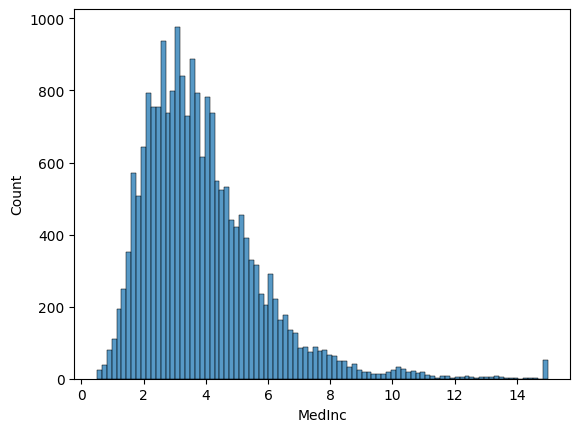

In [23]:
import seaborn as sns

sns.histplot(data=df['MedInc'])

Сравним средние значения и медианы, а также их разность, для MedInc и HouseAge

<Axes: xlabel='HouseAge', ylabel='Count'>

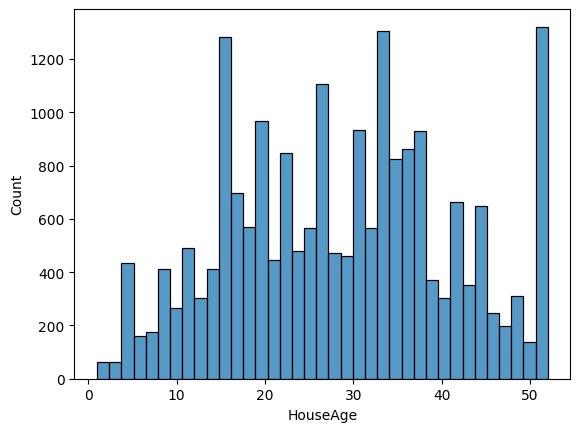

In [7]:
sns.histplot(data=df['HouseAge'])

In [38]:
import numpy as np

median_1 = np.median(df['MedInc'])
mean_1 = np.mean(df['MedInc'])

print(median_1)
print(mean_1)
print(abs(mean_1 - median_1))

3.5347999999999997
3.8706710029069766
0.3358710029069769


In [14]:
median_2 = np.median(df['HouseAge'])
mean_2 = np.mean(df['HouseAge'])

print(median_2)
print(mean_2)
print(abs(mean_2 - median_2))

29.0
28.639486434108527
0.3605135658914733


Таргет — медианная цена на дома в этой области. Построим гистограмму и оценим, насколько широко она распределена.

Посчитаем интерквартильный размах этой случайной величины - это расстояние между 25-й и 75-й перцентилями.

<Axes: xlabel='MedHouseVal', ylabel='Count'>

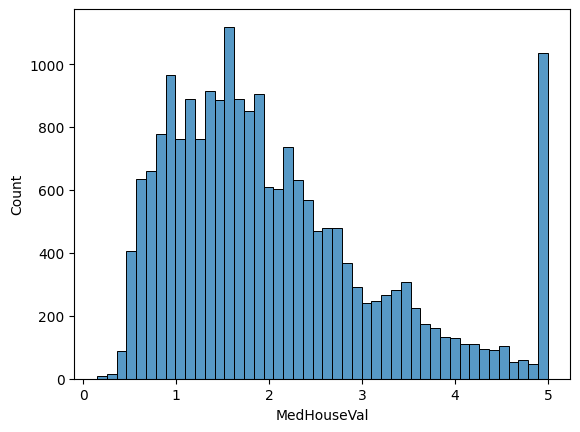

In [21]:
sns.histplot(target)

In [18]:
np.median(target)

1.797

In [20]:
q_25, q_75 = np.quantile(target, q=[0.25, 0.75])
print('q_25:', q_25, 'q_75:', q_75, 'q_75 - q_25', q_75 - q_25)

q_25: 1.196 q_75: 2.6472499999999997 q_75 - q_25 1.4512499999999997


In [11]:
import pandas as pd

df_with_target = df.copy()
df_with_target['target'] = target
df_with_target.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Посчитаем корреляцию Пирсона между целевой переменной и каждым из признаков. Определим у какого признака корееляция наибольшая по абсолютному значению

In [19]:
corr_matrix = df_with_target.corr(method='pearson')
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [18]:
max_corr = max(corr_matrix['target'].iloc[:-1])
min_corr = min(corr_matrix['target'].iloc[:-1])
max_abs_corr = max(max_corr, abs(min_corr))
max_abs_corr

0.6880752079585484

In [20]:
corr_matrix_kendall = df_with_target.corr(method='kendall')
corr_matrix_kendall

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.099609,0.470873,-0.170677,0.003885,-0.025733,-0.059947,-0.006248,0.495528
HouseAge,-0.099609,1.000000,-0.157219,-0.082004,-0.197112,-0.016475,0.026044,-0.104427,0.049822
AveRooms,0.470873,-0.157219,1.000000,0.055218,-0.072516,0.018495,0.084683,-0.029806,0.179175
AveBedrms,-0.170677,-0.082004,0.055218,1.000000,0.020396,-0.088062,0.031485,0.006993,-0.083489
Population,0.003885,-0.197112,-0.072516,0.020396,1.000000,0.164131,-0.082507,0.082974,0.002172
AveOccup,-0.025733,-0.016475,0.018495,-0.088062,0.164131,1.000000,-0.102363,0.121651,-0.174370
Latitude,-0.059947,0.026044,0.084683,0.031485,-0.082507,-0.102363,1.000000,-0.692317,-0.109411
Longitude,-0.006248,-0.104427,-0.029806,0.006993,0.082974,0.121651,-0.692317,1.000000,-0.052495
target,0.495528,0.049822,0.179175,-0.083489,0.002172,-0.174370,-0.109411,-0.052495,1.000000


In [21]:
corr_matrix_spearman = df_with_target.corr(method='spearman')
corr_matrix_spearman

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.147308,0.643671,-0.252426,0.006268,-0.044171,-0.088029,-0.009928,0.676778
HouseAge,-0.147308,1.000000,-0.231409,-0.120981,-0.283879,-0.024833,0.032440,-0.150752,0.074855
AveRooms,0.643671,-0.231409,1.000000,0.082046,-0.105385,0.018807,0.127134,-0.044783,0.263367
AveBedrms,-0.252426,-0.120981,0.082046,1.000000,0.027027,-0.132315,0.047197,0.010884,-0.125187
Population,0.006268,-0.283879,-0.105385,0.027027,1.000000,0.242337,-0.123626,0.123527,0.003839
AveOccup,-0.044171,-0.024833,0.018807,-0.132315,0.242337,1.000000,-0.150954,0.181468,-0.256594
Latitude,-0.088029,0.032440,0.127134,0.047197,-0.123626,-0.150954,1.000000,-0.879203,-0.165739
Longitude,-0.009928,-0.150752,-0.044783,0.010884,0.123527,0.181468,-0.879203,1.000000,-0.069667
target,0.676778,0.074855,0.263367,-0.125187,0.003839,-0.256594,-0.165739,-0.069667,1.000000


<Axes: xlabel='AveRooms', ylabel='Count'>

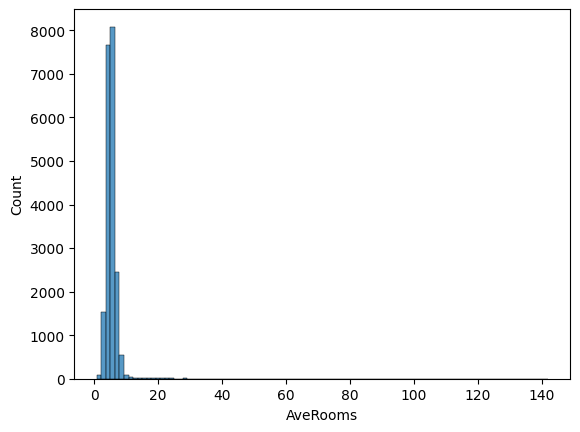

In [33]:
sns.histplot(data=df['AveRooms'], bins=100)

In [39]:
q_025, q0975 = np.quantile(df['AveRooms'], q=[0.025, 0.975])

q_025, q0975

(3.076419614422202, 8.344463470319633)

<Axes: xlabel='AveRooms', ylabel='Count'>

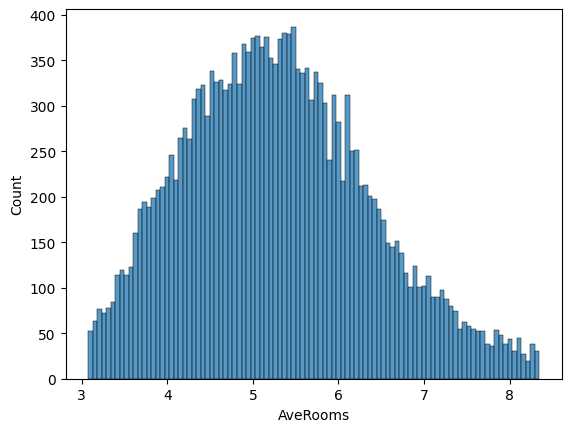

In [42]:
df_2 = df_with_target[(df_with_target['AveRooms'] > q_025) & (df['AveRooms'] < q0975)]

sns.histplot(data=df_2['AveRooms'], bins=100)

In [43]:
corr_matrix_pearson_2 = df_2.corr(method='pearson')

corr_matrix_pearson_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.121171,0.664036,-0.232461,0.016708,0.021208,-0.087222,-0.014508,0.694201
HouseAge,-0.121171,1.000000,-0.210100,-0.110252,-0.314313,0.010113,0.015636,-0.105642,0.114798
AveRooms,0.664036,-0.210100,1.000000,0.145308,-0.023580,-0.011191,0.117638,-0.082522,0.327759
AveBedrms,-0.232461,-0.110252,0.145308,1.000000,-0.021647,-0.013545,0.066433,-0.000453,-0.115649
Population,0.016708,-0.314313,-0.023580,-0.021647,1.000000,0.063986,-0.101198,0.100242,-0.028823
AveOccup,0.021208,0.010113,-0.011191,-0.013545,0.063986,1.000000,0.003617,0.004125,-0.029137
Latitude,-0.087222,0.015636,0.117638,0.066433,-0.101198,0.003617,1.000000,-0.928679,-0.145044
Longitude,-0.014508,-0.105642,-0.082522,-0.000453,0.100242,0.004125,-0.928679,1.000000,-0.046534
target,0.694201,0.114798,0.327759,-0.115649,-0.028823,-0.029137,-0.145044,-0.046534,1.000000


In [44]:
corr_matrix_kendall_2 = df_2.corr(method='kendall')
corr_matrix_kendall_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.093259,0.462639,-0.191443,0.007248,-0.032286,-0.065137,-0.006650,0.506861
HouseAge,-0.093259,1.000000,-0.144247,-0.069242,-0.213344,-0.024505,0.029202,-0.103548,0.053695
AveRooms,0.462639,-0.144247,1.000000,0.018543,-0.059134,0.029950,0.079534,-0.036809,0.186279
AveBedrms,-0.191443,-0.069242,0.018543,1.000000,0.034104,-0.080180,0.025904,0.001163,-0.091400
Population,0.007248,-0.213344,-0.059134,0.034104,1.000000,0.160580,-0.078259,0.086596,-0.003139
AveOccup,-0.032286,-0.024505,0.029950,-0.080180,0.160580,1.000000,-0.099924,0.124951,-0.188138
Latitude,-0.065137,0.029202,0.079534,0.025904,-0.078259,-0.099924,1.000000,-0.698098,-0.110058
Longitude,-0.006650,-0.103548,-0.036809,0.001163,0.086596,0.124951,-0.698098,1.000000,-0.054347
target,0.506861,0.053695,0.186279,-0.091400,-0.003139,-0.188138,-0.110058,-0.054347,1.000000


In [45]:
corr_matrix_spearman_2 = df_2.corr(method='spearman')
corr_matrix_spearman_2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
MedInc,1.000000,-0.138427,0.638630,-0.282923,0.011110,-0.053017,-0.095929,-0.010490,0.692838
HouseAge,-0.138427,1.000000,-0.213166,-0.102129,-0.307959,-0.036712,0.036947,-0.149228,0.080644
AveRooms,0.638630,-0.213166,1.000000,0.027533,-0.086679,0.035610,0.118825,-0.054282,0.274793
AveBedrms,-0.282923,-0.102129,0.027533,1.000000,0.048143,-0.120315,0.038794,0.002078,-0.136390
Population,0.011110,-0.307959,-0.086679,0.048143,1.000000,0.237694,-0.117379,0.128732,-0.004204
AveOccup,-0.053017,-0.036712,0.035610,-0.120315,0.237694,1.000000,-0.147755,0.186329,-0.276619
Latitude,-0.095929,0.036947,0.118825,0.038794,-0.117379,-0.147755,1.000000,-0.883129,-0.166607
Longitude,-0.010490,-0.149228,-0.054282,0.002078,0.128732,0.186329,-0.883129,1.000000,-0.071951
target,0.692838,0.080644,0.274793,-0.136390,-0.004204,-0.276619,-0.166607,-0.071951,1.000000


<Axes: >

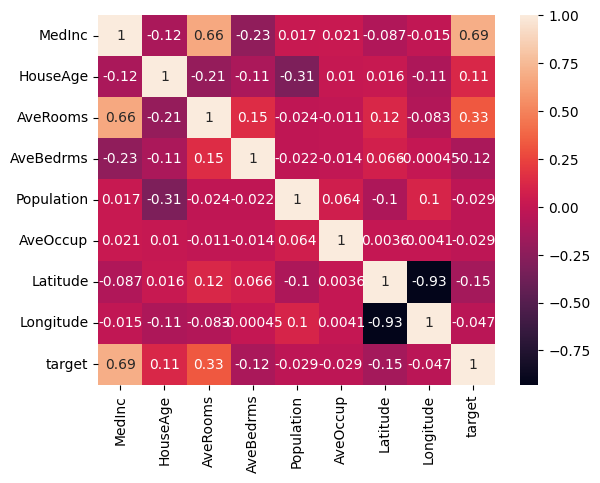

In [48]:
sns.heatmap(df_2.corr(), annot = True)
